In [12]:
import itertools
from collections import OrderedDict

import numpy as np
import pandas as pd
from scipy.interpolate import griddata
from scipy.spatial import QhullError

import matplotlib.pyplot as plt
from matplotlib import cm

from IPython.display import display, HTML

import pandas as pd

pd.options.display.max_rows
# pd.options.plotting.backend = "pandas_bokeh"

from results_analytics import *

from IPython.core.display import display, HTML

display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

C:\Users\scelles\AppData\Local\Temp\ipykernel_5596\3789872903.py:20: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



In [13]:
query = "SELECT * FROM backtest_runs"
db_uri = "sqlite:///backtests.sqlite"
df = load_backtests(query, db_uri)
df

,scheduled_time,start_time,end_time,input,rsi_period,rsi_min,rsi_max,exchange,quote_currency,trade_start_time,...,metrics.risk_free_rate.value,metrics.sharpe.value,metrics.sortino.value,metrics.value_at_risk.value,metrics.variance.value,metrics.volatility.value,trades.created,trades.limits_executed,trades.limits_canceled,trades.executed_market_orders
id,,,,,,,,,,,,,,,,,,,,,
1,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.928598,"{'rsi_period': 10, 'rsi_min': 0.0, 'rsi_max': ...",10,0.0,10.0,keyless,USD,2020-07-17 17:31:27.603789824,...,0.0,0.00,NaN,0.00,0.00,0.00,[],[],[],[]
2,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:31:28.350850,"{'rsi_period': 10, 'rsi_min': 0.0, 'rsi_max': ...",10,0.0,20.0,keyless,USD,2020-07-17 17:31:27.967743488,...,0.0,0.00,NaN,0.00,0.00,0.00,[],[],[],[]
3,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:31:28.694829,"{'rsi_period': 10, 'rsi_min': 0.0, 'rsi_max': ...",10,0.0,30.0,keyless,USD,2020-07-17 17:31:28.387802112,...,0.0,0.00,NaN,0.00,0.00,0.00,[],[],[],[]
4,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:31:29.071501,"{'rsi_period': 10, 'rsi_min': 0.0, 'rsi_max': ...",10,0.0,40.0,keyless,USD,2020-07-17 17:31:28.737957376,...,0.0,0.00,NaN,0.00,0.00,0.00,[],[],[],[]
5,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:31:29.687023,"{'rsi_period': 10, 'rsi_min': 0.0, 'rsi_max': ...",10,0.0,50.0,keyless,USD,2020-07-17 17:31:29.316427520,...,0.0,0.00,NaN,0.00,0.00,0.00,[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:36:30.849483,"{'rsi_period': 19, 'rsi_min': 70.0, 'rsi_max':...",19,70.0,90.0,keyless,USD,2020-07-17 17:36:30.472754176,...,0.0,0.79,1.12,616.87,33.29,0.58,"[{'symbol': 'BTC-USD', 'id': '987a3a0b-8cab-e9...",[],[],[{'id': '987a3a0b-8cab-e926-8954-4cf70d0b581e'...
547,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:36:31.246289,"{'rsi_period': 19, 'rsi_min': 70.0, 'rsi_max':...",19,70.0,100.0,keyless,USD,2020-07-17 17:36:30.902155264,...,0.0,0.79,1.12,616.87,33.29,0.58,"[{'symbol': 'BTC-USD', 'id': 'b282d759-770c-c6...",[],[],[{'id': 'b282d759-770c-c649-2485-15f35289c23b'...
548,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:36:31.699625,"{'rsi_period': 19, 'rsi_min': 80.0, 'rsi_max':...",19,80.0,90.0,keyless,USD,2020-07-17 17:36:31.293471232,...,0.0,0.79,1.12,616.87,33.29,0.58,"[{'symbol': 'BTC-USD', 'id': '63afb3ca-2f83-b7...",[],[],[{'id': '63afb3ca-2f83-b768-7308-cd0761932634'...


In [14]:
parameters_all = pd.Index(df["input"].iloc[-1].keys())
objective = "metrics.sharpe.value"
df_results = df[[*parameters_all, objective]]
for col in df.columns:
    if col.startswith("metrics."):
        df_results[col] = df[col]
df_results.sort_values("metrics.sharpe.value", inplace=True, ascending=False)
# df_results = df_results[df_results[objective] > 0]
df_results

C:\Users\scelles\AppData\Local\Temp\ipykernel_5596\1821187447.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\scelles\AppData\Local\Temp\ipykernel_5596\1821187447.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\scelles\AppData\Local\Temp\ipykernel_5596\1821187447.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,rsi_period,rsi_min,rsi_max,metrics.sharpe.value,metrics.calmar.value,metrics.cagr.value,metrics.cavr.value,metrics.cum_returns.value,metrics.max_drawdown.value,metrics.resampled_time.value,metrics.risk_free_rate.value,metrics.sortino.value,metrics.value_at_risk.value,metrics.variance.value,metrics.volatility.value
id,,,,,,,,,,,,,,,
188,13,20.0,60.0,0.92,1.00,16.0,3.61,48.0,11.0,86400.0,0.0,0.44,0.00,1.34,0.12
154,12,50.0,90.0,0.90,0.66,66.0,25.15,294.0,76.0,86400.0,0.0,1.27,597.66,31.60,0.56
209,13,50.0,90.0,0.90,0.66,66.0,25.15,294.0,76.0,86400.0,0.0,1.27,597.66,31.60,0.56
218,13,80.0,90.0,0.83,0.62,57.0,26.94,236.0,76.0,86400.0,0.0,1.17,615.31,32.76,0.57
158,12,60.0,90.0,0.83,0.62,57.0,26.92,239.0,77.0,86400.0,0.0,1.17,615.31,32.66,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,12,20.0,90.0,-0.26,-0.12,-17.0,29.17,-39.0,66.0,86400.0,0.0,-0.20,274.82,9.61,0.31
191,13,20.0,90.0,-0.26,-0.12,-17.0,29.17,-39.0,66.0,86400.0,0.0,-0.20,274.82,9.61,0.31
146,12,40.0,60.0,-0.27,-0.15,-23.0,37.06,-50.0,71.0,86400.0,0.0,-0.24,316.98,15.00,0.39


In [15]:
parameters_space = OrderedDict(
    [(parameter, sorted(df[parameter].unique())) for parameter in parameters_all]
)
parameters_space

OrderedDict([('rsi_period', [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
             ('rsi_min',
              [0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0]),
             ('rsi_max',
              [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0])])

In [16]:
z_col_origin = "objective"
z_col = "metrics.sharpe.value"

In [17]:
x_col, y_col = "rsi_period", "rsi_min"
others_parameters = parameters_all.copy().drop([x_col, y_col])
others_parameters

Index(['rsi_max'], dtype='object')

In [18]:
df_results[objective].min(), df_results[objective].max()

(-0.34, 0.92)

In [19]:
zmin, zmax = -1, 1


def plot_3dsurf_mpl(x2, y2, z2):
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_zlabel(z_col)
    surf = ax.plot_surface(
        x2,
        y2,
        z2,
        rstride=1,
        cstride=1,
        cmap=cm.coolwarm,
        linewidth=0,
        antialiased=False,
        vmin=zmin,
        vmax=zmax,
    )
    fig.colorbar(surf)
    plt.show()


def plot_imshow_mplt(z2):
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    axi = plt.imshow(z2, cmap=cm.coolwarm, extent=[3, 13, 13, 3], vmin=zmin, vmax=zmax)
    plt.colorbar()
    plt.show()


import plotly.graph_objects as go


def plot_3dsurf_plotly(x2, y2, z2):
    fig = go.Figure(data=[go.Surface(z=z2, x=x2, y=y2, colorscale="balance")])
    fig.update_layout(
        title=f"3D surface of {z_col} vs {x_col} & {y_col}",
        autosize=False,
        width=500,
        height=500,
        margin=dict(l=65, r=50, b=65, t=90),
    )
    fig.update_layout(width=800, height=600)
    fig.update_scenes(
        xaxis_title_text=x_col, yaxis_title_text=y_col, zaxis_title_text=z_col
    )

    fig.data[0].update(cmin=zmin, cmax=zmax)

    fig.show()

,scheduled_time,start_time,end_time,input,rsi_period,rsi_min,rsi_max,exchange,quote_currency,trade_start_time,...,metrics.risk_free_rate.value,metrics.sharpe.value,metrics.sortino.value,metrics.value_at_risk.value,metrics.variance.value,metrics.volatility.value,trades.created,trades.limits_executed,trades.limits_canceled,trades.executed_market_orders
id,,,,,,,,,,,,,,,,,,,,,
1,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.928598,"{'rsi_period': 10, 'rsi_min': 0.0, 'rsi_max': ...",10,0.0,10.0,keyless,USD,2020-07-17 17:31:27.603789824,...,0.0,0.0,NaN,0.0,0.0,0.0,[],[],[],[]
56,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:32:07.386355,"{'rsi_period': 11, 'rsi_min': 0.0, 'rsi_max': ...",11,0.0,10.0,keyless,USD,2020-07-17 17:32:05.954907648,...,0.0,0.0,NaN,0.0,0.0,0.0,[],[],[],[]
111,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:32:52.238091,"{'rsi_period': 12, 'rsi_min': 0.0, 'rsi_max': ...",12,0.0,10.0,keyless,USD,2020-07-17 17:32:51.786810368,...,0.0,0.0,NaN,0.0,0.0,0.0,[],[],[],[]
166,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:33:24.589892,"{'rsi_period': 13, 'rsi_min': 0.0, 'rsi_max': ...",13,0.0,10.0,keyless,USD,2020-07-17 17:33:24.054541056,...,0.0,0.0,NaN,0.0,0.0,0.0,[],[],[],[]
221,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:34:11.179860,"{'rsi_period': 14, 'rsi_min': 0.0, 'rsi_max': ...",14,0.0,10.0,keyless,USD,2020-07-17 17:34:10.687080960,...,0.0,0.0,NaN,0.0,0.0,0.0,[],[],[],[]
276,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:34:48.141216,"{'rsi_period': 15, 'rsi_min': 0.0, 'rsi_max': ...",15,0.0,10.0,keyless,USD,2020-07-17 17:34:47.621701376,...,0.0,0.0,NaN,0.0,0.0,0.0,[],[],[],[]
331,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:11.384893,"{'rsi_period': 16, 'rsi_min': 0.0, 'rsi_max': ...",16,0.0,10.0,keyless,USD,2020-07-17 17:35:10.995605760,...,0.0,0.0,NaN,0.0,0.0,0.0,[],[],[],[]
386,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:32.788374,"{'rsi_period': 17, 'rsi_min': 0.0, 'rsi_max': ...",17,0.0,10.0,keyless,USD,2020-07-17 17:35:32.512940544,...,0.0,0.0,NaN,0.0,0.0,0.0,[],[],[],[]
441,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:52.424160,"{'rsi_period': 18, 'rsi_min': 0.0, 'rsi_max': ...",18,0.0,10.0,keyless,USD,2020-07-17 17:35:52.154485504,...,0.0,0.0,NaN,0.0,0.0,0.0,[],[],[],[]


,scheduled_time,start_time,end_time,input,rsi_period,rsi_min,rsi_max,exchange,quote_currency,trade_start_time,...,metrics.risk_free_rate.value,metrics.sharpe.value,metrics.sortino.value,metrics.value_at_risk.value,metrics.variance.value,metrics.volatility.value,trades.created,trades.limits_executed,trades.limits_canceled,trades.executed_market_orders
id,,,,,,,,,,,,,,,,,,,,,
2,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:31:28.350850,"{'rsi_period': 10, 'rsi_min': 0.0, 'rsi_max': ...",10,0.0,20.0,keyless,USD,2020-07-17 17:31:27.967743488,...,0.0,0.0,NaN,0.0,0.0,0.0,[],[],[],[]
11,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:31:31.998204,"{'rsi_period': 10, 'rsi_min': 10.0, 'rsi_max':...",10,10.0,20.0,keyless,USD,2020-07-17 17:31:31.700442112,...,0.0,0.0,NaN,0.0,0.0,0.0,[],[],[],[]
497,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:36:12.522808,"{'rsi_period': 19, 'rsi_min': 0.0, 'rsi_max': ...",19,0.0,20.0,keyless,USD,2020-07-17 17:36:12.267203840,...,0.0,0.0,NaN,0.0,0.0,0.0,[],[],[],[]
451,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:55.874589,"{'rsi_period': 18, 'rsi_min': 10.0, 'rsi_max':...",18,10.0,20.0,keyless,USD,2020-07-17 17:35:55.616051712,...,0.0,0.0,NaN,0.0,0.0,0.0,[],[],[],[]
442,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:52.722736,"{'rsi_period': 18, 'rsi_min': 0.0, 'rsi_max': ...",18,0.0,20.0,keyless,USD,2020-07-17 17:35:52.469000704,...,0.0,0.0,NaN,0.0,0.0,0.0,[],[],[],[]
396,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:36.512968,"{'rsi_period': 17, 'rsi_min': 10.0, 'rsi_max':...",17,10.0,20.0,keyless,USD,2020-07-17 17:35:36.106852352,...,0.0,0.0,NaN,0.0,0.0,0.0,[],[],[],[]
387,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:33.128220,"{'rsi_period': 17, 'rsi_min': 0.0, 'rsi_max': ...",17,0.0,20.0,keyless,USD,2020-07-17 17:35:32.826248192,...,0.0,0.0,NaN,0.0,0.0,0.0,[],[],[],[]
341,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:15.866862,"{'rsi_period': 16, 'rsi_min': 10.0, 'rsi_max':...",16,10.0,20.0,keyless,USD,2020-07-17 17:35:15.412809472,...,0.0,0.0,NaN,0.0,0.0,0.0,[],[],[],[]
332,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:11.710089,"{'rsi_period': 16, 'rsi_min': 0.0, 'rsi_max': ...",16,0.0,20.0,keyless,USD,2020-07-17 17:35:11.430755328,...,0.0,0.0,NaN,0.0,0.0,0.0,[],[],[],[]


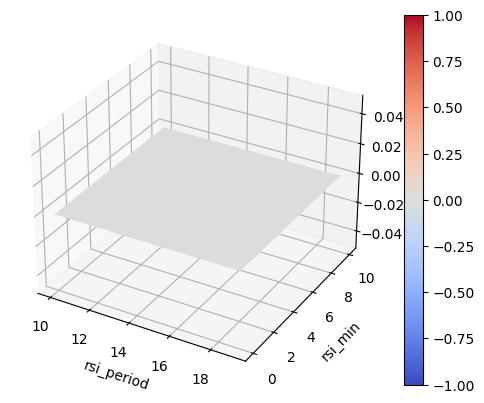

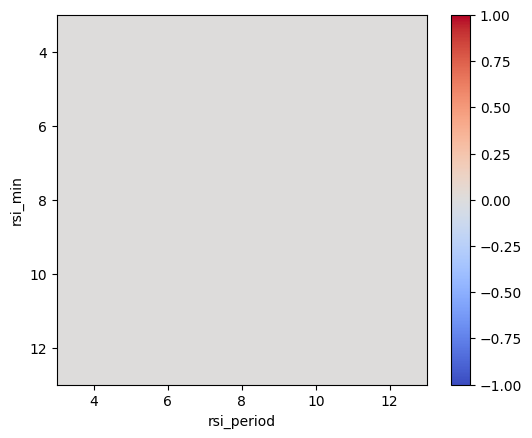

,scheduled_time,start_time,end_time,input,rsi_period,rsi_min,rsi_max,exchange,quote_currency,trade_start_time,...,metrics.risk_free_rate.value,metrics.sharpe.value,metrics.sortino.value,metrics.value_at_risk.value,metrics.variance.value,metrics.volatility.value,trades.created,trades.limits_executed,trades.limits_canceled,trades.executed_market_orders
id,,,,,,,,,,,,,,,,,,,,,
185,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:33:37.814433,"{'rsi_period': 13, 'rsi_min': 20.0, 'rsi_max':...",13,20.0,30.0,keyless,USD,2020-07-17 17:33:36.700382464,...,0.0,0.73,0.13,0.0,0.32,0.06,"[{'symbol': 'BTC-USD', 'id': '5645f735-401c-6a...",[],[],[{'id': '5645f735-401c-6a66-0da1-3663544955cb'...
75,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:32:18.285518,"{'rsi_period': 11, 'rsi_min': 20.0, 'rsi_max':...",11,20.0,30.0,keyless,USD,2020-07-17 17:32:17.780636672,...,0.0,0.48,0.10,0.0,0.78,0.09,"[{'symbol': 'BTC-USD', 'id': '50c8a94a-440e-e6...",[],[],[{'id': '50c8a94a-440e-e6bb-575c-fa76d415f67c'...
20,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:31:39.292844,"{'rsi_period': 10, 'rsi_min': 20.0, 'rsi_max':...",10,20.0,30.0,keyless,USD,2020-07-17 17:31:38.808066560,...,0.0,0.40,0.09,0.0,1.32,0.11,"[{'symbol': 'BTC-USD', 'id': '18f6a573-b3eb-24...",[],[],[{'id': '18f6a573-b3eb-24bc-70ca-6b557bc05fbd'...
130,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:33:05.015459,"{'rsi_period': 12, 'rsi_min': 20.0, 'rsi_max':...",12,20.0,30.0,keyless,USD,2020-07-17 17:33:04.503218688,...,0.0,0.38,0.05,0.0,0.44,0.07,"[{'symbol': 'BTC-USD', 'id': '1b4a99e8-b82c-b9...",[],[],[{'id': '1b4a99e8-b82c-b926-9b6d-4d5a7ec32cec'...
405,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:39.711859,"{'rsi_period': 17, 'rsi_min': 20.0, 'rsi_max':...",17,20.0,30.0,keyless,USD,2020-07-17 17:35:39.445328896,...,0.0,0.00,NaN,0.0,0.00,0.00,[],[],[],[]
342,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:16.362591,"{'rsi_period': 16, 'rsi_min': 10.0, 'rsi_max':...",16,10.0,30.0,keyless,USD,2020-07-17 17:35:15.918952192,...,0.0,0.00,NaN,0.0,0.00,0.00,[],[],[],[]
350,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:19.460541,"{'rsi_period': 16, 'rsi_min': 20.0, 'rsi_max':...",16,20.0,30.0,keyless,USD,2020-07-17 17:35:19.164305152,...,0.0,0.00,NaN,0.0,0.00,0.00,[],[],[],[]
388,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:33.542467,"{'rsi_period': 17, 'rsi_min': 0.0, 'rsi_max': ...",17,0.0,30.0,keyless,USD,2020-07-17 17:35:33.184599808,...,0.0,0.00,NaN,0.0,0.00,0.00,[],[],[],[]
397,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:36.854743,"{'rsi_period': 17, 'rsi_min': 10.0, 'rsi_max':...",17,10.0,30.0,keyless,USD,2020-07-17 17:35:36.553503488,...,0.0,0.00,NaN,0.0,0.00,0.00,[],[],[],[]


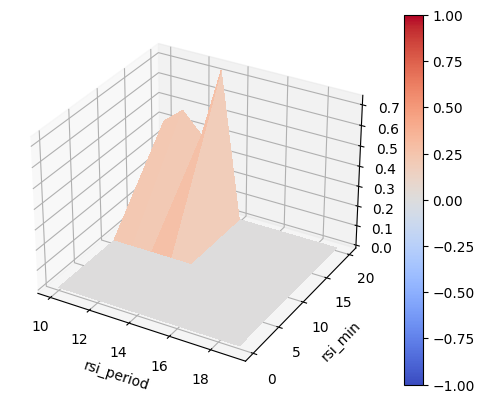

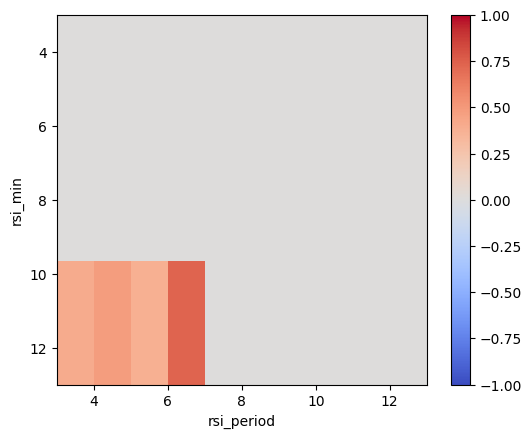

,scheduled_time,start_time,end_time,input,rsi_period,rsi_min,rsi_max,exchange,quote_currency,trade_start_time,...,metrics.risk_free_rate.value,metrics.sharpe.value,metrics.sortino.value,metrics.value_at_risk.value,metrics.variance.value,metrics.volatility.value,trades.created,trades.limits_executed,trades.limits_canceled,trades.executed_market_orders
id,,,,,,,,,,,,,,,,,,,,,
186,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:33:38.834925,"{'rsi_period': 13, 'rsi_min': 20.0, 'rsi_max':...",13,20.0,40.0,keyless,USD,2020-07-17 17:33:37.965920000,...,0.0,0.67,0.24,0.00,0.47,0.07,"[{'symbol': 'BTC-USD', 'id': 'def6f9be-1280-94...",[],[],[{'id': 'def6f9be-1280-94e6-6ff5-3ba2f73be973'...
523,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:36:22.015706,"{'rsi_period': 19, 'rsi_min': 30.0, 'rsi_max':...",19,30.0,40.0,keyless,USD,2020-07-17 17:36:21.723933696,...,0.0,0.43,0.21,1.72,3.75,0.19,"[{'symbol': 'BTC-USD', 'id': 'c31e324a-4bca-d2...",[],[],[{'id': 'c31e324a-4bca-d23b-79d9-2824294f795d'...
303,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:00.929481,"{'rsi_period': 15, 'rsi_min': 30.0, 'rsi_max':...",15,30.0,40.0,keyless,USD,2020-07-17 17:35:00.633620992,...,0.0,0.43,0.20,15.15,3.37,0.18,"[{'symbol': 'BTC-USD', 'id': '3837d7ad-7872-23...",[],[],[{'id': '3837d7ad-7872-234c-bb04-bbab5a1c6a95'...
248,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:34:25.359906,"{'rsi_period': 14, 'rsi_min': 30.0, 'rsi_max':...",14,30.0,40.0,keyless,USD,2020-07-17 17:34:24.711318528,...,0.0,0.39,0.17,59.79,4.45,0.21,"[{'symbol': 'BTC-USD', 'id': '4fce44dc-2bef-ce...",[],[],[{'id': '4fce44dc-2bef-ce55-3bc1-98ade152aad5'...
131,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:33:05.500948,"{'rsi_period': 12, 'rsi_min': 20.0, 'rsi_max':...",12,20.0,40.0,keyless,USD,2020-07-17 17:33:05.073696256,...,0.0,0.37,0.09,0.00,0.59,0.08,"[{'symbol': 'BTC-USD', 'id': 'b19e2d62-d184-4a...",[],[],[{'id': 'b19e2d62-d184-4af0-388e-7c3c10739e6e'...
193,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:33:47.150351,"{'rsi_period': 13, 'rsi_min': 30.0, 'rsi_max':...",13,30.0,40.0,keyless,USD,2020-07-17 17:33:46.220300800,...,0.0,0.36,0.16,57.61,4.59,0.21,"[{'symbol': 'BTC-USD', 'id': '32a42c2d-a8a5-d2...",[],[],[{'id': '32a42c2d-a8a5-d231-ad3f-7bf612fa9225'...
468,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:36:01.734743,"{'rsi_period': 18, 'rsi_min': 30.0, 'rsi_max':...",18,30.0,40.0,keyless,USD,2020-07-17 17:36:01.390829056,...,0.0,0.35,0.16,0.00,3.36,0.18,"[{'symbol': 'BTC-USD', 'id': 'faa02688-19c9-dd...",[],[],[{'id': 'faa02688-19c9-ddde-74fb-f00a32766f0a'...
413,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:42.337778,"{'rsi_period': 17, 'rsi_min': 30.0, 'rsi_max':...",17,30.0,40.0,keyless,USD,2020-07-17 17:35:42.052513024,...,0.0,0.35,0.16,0.00,3.36,0.18,"[{'symbol': 'BTC-USD', 'id': 'c7946927-79c6-ac...",[],[],[{'id': 'c7946927-79c6-ac07-de5d-498063e4c69e'...
358,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:22.336424,"{'rsi_period': 16, 'rsi_min': 30.0, 'rsi_max':...",16,30.0,40.0,keyless,USD,2020-07-17 17:35:21.989902592,...,0.0,0.24,0.11,0.00,3.20,0.18,"[{'symbol': 'BTC-USD', 'id': 'ba5e52e7-38cd-53...",[],[],[{'id': 'ba5e52e7-38cd-5357-aa15-def4d864ead2'...


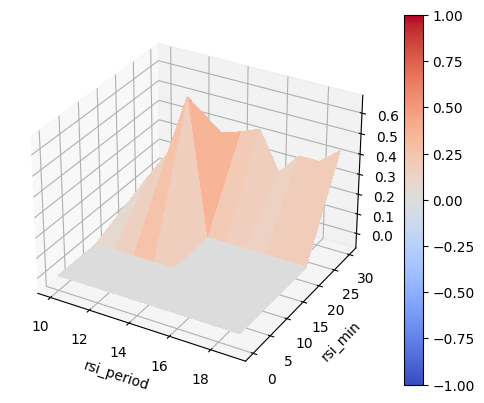

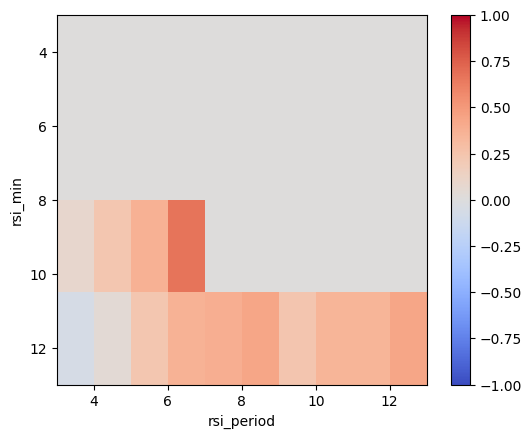

,scheduled_time,start_time,end_time,input,rsi_period,rsi_min,rsi_max,exchange,quote_currency,trade_start_time,...,metrics.risk_free_rate.value,metrics.sharpe.value,metrics.sortino.value,metrics.value_at_risk.value,metrics.variance.value,metrics.volatility.value,trades.created,trades.limits_executed,trades.limits_canceled,trades.executed_market_orders
id,,,,,,,,,,,,,,,,,,,,,
187,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:33:39.593615,"{'rsi_period': 13, 'rsi_min': 20.0, 'rsi_max':...",13,20.0,50.0,keyless,USD,2020-07-17 17:33:38.927449600,...,0.0,0.73,0.30,0.00,1.10,0.11,"[{'symbol': 'BTC-USD', 'id': '65e2c357-ea32-5d...",[],[],[{'id': '65e2c357-ea32-5dd4-c221-713000d9e1bf'...
132,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:33:06.329548,"{'rsi_period': 12, 'rsi_min': 20.0, 'rsi_max':...",12,20.0,50.0,keyless,USD,2020-07-17 17:33:05.935850496,...,0.0,0.62,0.20,0.00,1.05,0.10,"[{'symbol': 'BTC-USD', 'id': '05ec0dde-2bf1-3c...",[],[],[{'id': '05ec0dde-2bf1-3c02-9d84-b371e87298a3'...
194,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:33:48.203136,"{'rsi_period': 13, 'rsi_min': 30.0, 'rsi_max':...",13,30.0,50.0,keyless,USD,2020-07-17 17:33:47.258215168,...,0.0,0.56,0.35,158.48,7.16,0.27,"[{'symbol': 'BTC-USD', 'id': '4250f629-a368-72...",[],[],[{'id': '4250f629-a368-7226-37f5-471d9164c71e'...
304,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:01.249602,"{'rsi_period': 15, 'rsi_min': 30.0, 'rsi_max':...",15,30.0,50.0,keyless,USD,2020-07-17 17:35:00.974738176,...,0.0,0.55,0.34,132.96,5.81,0.24,"[{'symbol': 'BTC-USD', 'id': 'd7610bc8-207a-e2...",[],[],[{'id': 'd7610bc8-207a-e267-7ed4-60c8398b49b4'...
249,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:34:25.887356,"{'rsi_period': 14, 'rsi_min': 30.0, 'rsi_max':...",14,30.0,50.0,keyless,USD,2020-07-17 17:34:25.428721664,...,0.0,0.48,0.30,154.50,7.02,0.26,"[{'symbol': 'BTC-USD', 'id': '78615460-f68c-f1...",[],[],[{'id': '78615460-f68c-f1e9-632c-26d695e3bf4b'...
139,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:33:10.190075,"{'rsi_period': 12, 'rsi_min': 30.0, 'rsi_max':...",12,30.0,50.0,keyless,USD,2020-07-17 17:33:09.693997824,...,0.0,0.47,0.29,154.29,7.34,0.27,"[{'symbol': 'BTC-USD', 'id': 'cefe2fc8-51eb-c3...",[],[],[{'id': 'cefe2fc8-51eb-c327-ceb7-6556f07fc596'...
77,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:32:21.645333,"{'rsi_period': 11, 'rsi_min': 20.0, 'rsi_max':...",11,20.0,50.0,keyless,USD,2020-07-17 17:32:20.405335296,...,0.0,0.44,0.20,0.00,3.25,0.18,"[{'symbol': 'BTC-USD', 'id': 'a87f9c13-d002-59...",[],[],[{'id': 'a87f9c13-d002-59ac-3e94-f4d369f9d88d'...
29,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:31:49.230399,"{'rsi_period': 10, 'rsi_min': 30.0, 'rsi_max':...",10,30.0,50.0,keyless,USD,2020-07-17 17:31:48.803466496,...,0.0,0.42,0.28,245.25,9.61,0.31,"[{'symbol': 'BTC-USD', 'id': 'b3a0fd2b-a7b4-4d...",[],[],[{'id': 'b3a0fd2b-a7b4-4db9-5f50-ebb7df02397e'...
22,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:31:43.836171,"{'rsi_period': 10, 'rsi_min': 20.0, 'rsi_max':...",10,20.0,50.0,keyless,USD,2020-07-17 17:31:40.798023936,...,0.0,0.39,0.20,0.00,3.97,0.20,"[{'symbol': 'BTC-USD', 'id': '8783b2ff-fe90-b1...",[],[],[{'id': '8783b2ff-fe90-b175-00c0-56dbcdd10a12'...


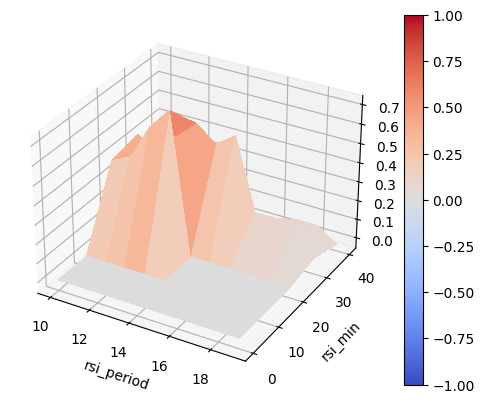

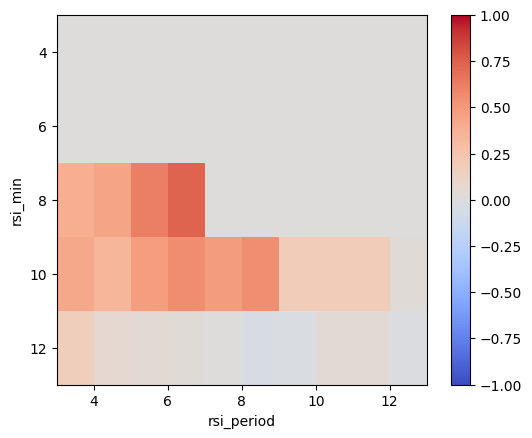

,scheduled_time,start_time,end_time,input,rsi_period,rsi_min,rsi_max,exchange,quote_currency,trade_start_time,...,metrics.risk_free_rate.value,metrics.sharpe.value,metrics.sortino.value,metrics.value_at_risk.value,metrics.variance.value,metrics.volatility.value,trades.created,trades.limits_executed,trades.limits_canceled,trades.executed_market_orders
id,,,,,,,,,,,,,,,,,,,,,
188,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:33:41.307704,"{'rsi_period': 13, 'rsi_min': 20.0, 'rsi_max':...",13,20.0,60.0,keyless,USD,2020-07-17 17:33:40.393885184,...,0.0,0.92,0.44,0.00,1.34,0.12,"[{'symbol': 'BTC-USD', 'id': '6e0b79ee-b3fd-3f...",[],[],[{'id': '6e0b79ee-b3fd-3fe0-2541-a673656c82ef'...
133,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:33:06.751619,"{'rsi_period': 12, 'rsi_min': 20.0, 'rsi_max':...",12,20.0,60.0,keyless,USD,2020-07-17 17:33:06.389372160,...,0.0,0.67,0.26,0.00,1.43,0.12,"[{'symbol': 'BTC-USD', 'id': '17f7e855-1f1c-06...",[],[],[{'id': '17f7e855-1f1c-06ae-96e6-1bd657078c56'...
23,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:31:45.907459,"{'rsi_period': 10, 'rsi_min': 20.0, 'rsi_max':...",10,20.0,60.0,keyless,USD,2020-07-17 17:31:45.418363904,...,0.0,0.34,0.21,133.76,5.89,0.24,"[{'symbol': 'BTC-USD', 'id': '25f99c80-4e63-a7...",[],[],[{'id': '25f99c80-4e63-a728-189e-89cf23918a9c'...
78,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:32:22.036090,"{'rsi_period': 11, 'rsi_min': 20.0, 'rsi_max':...",11,20.0,60.0,keyless,USD,2020-07-17 17:32:21.689758464,...,0.0,0.33,0.18,74.02,5.09,0.23,"[{'symbol': 'BTC-USD', 'id': '936801a7-402a-32...",[],[],[{'id': '936801a7-402a-32e9-aa67-f8c4d8f91532'...
305,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:01.591411,"{'rsi_period': 15, 'rsi_min': 30.0, 'rsi_max':...",15,30.0,60.0,keyless,USD,2020-07-17 17:35:01.298840064,...,0.0,0.26,0.18,234.99,8.81,0.30,"[{'symbol': 'BTC-USD', 'id': 'b6ccc3c5-5cb5-36...",[],[],[{'id': 'b6ccc3c5-5cb5-3684-2c48-2d7bc3dcd304'...
470,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:36:02.572748,"{'rsi_period': 18, 'rsi_min': 30.0, 'rsi_max':...",18,30.0,60.0,keyless,USD,2020-07-17 17:36:02.182026496,...,0.0,0.22,0.20,312.86,11.48,0.34,"[{'symbol': 'BTC-USD', 'id': '3a0d2792-24b9-5e...",[],[],[{'id': '3a0d2792-24b9-5e70-ec5a-3cd2b8f6e8ac'...
525,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:36:22.806904,"{'rsi_period': 19, 'rsi_min': 30.0, 'rsi_max':...",19,30.0,60.0,keyless,USD,2020-07-17 17:36:22.504213248,...,0.0,0.22,0.20,312.86,11.48,0.34,"[{'symbol': 'BTC-USD', 'id': 'c19a43e4-5f78-f6...",[],[],[{'id': 'c19a43e4-5f78-f6a5-67c5-86d5ce233e38'...
360,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:23.074118,"{'rsi_period': 16, 'rsi_min': 30.0, 'rsi_max':...",16,30.0,60.0,keyless,USD,2020-07-17 17:35:22.751563776,...,0.0,0.21,0.15,235.15,8.24,0.29,"[{'symbol': 'BTC-USD', 'id': 'faa58087-318b-e1...",[],[],[{'id': 'faa58087-318b-e120-3aab-289ddc6b1438'...
250,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:34:26.448183,"{'rsi_period': 14, 'rsi_min': 30.0, 'rsi_max':...",14,30.0,60.0,keyless,USD,2020-07-17 17:34:25.940750592,...,0.0,0.11,0.08,268.69,9.89,0.31,"[{'symbol': 'BTC-USD', 'id': '1f7c8083-2708-4b...",[],[],[{'id': '1f7c8083-2708-4b48-9b0e-aa34cb138755'...


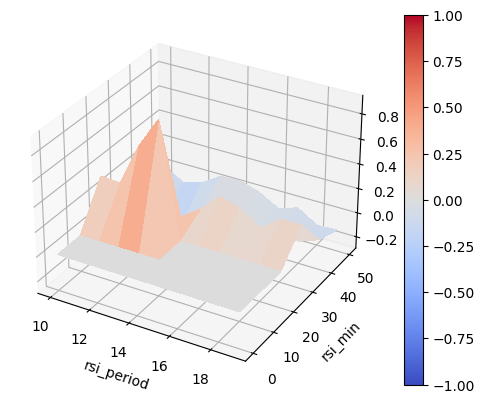

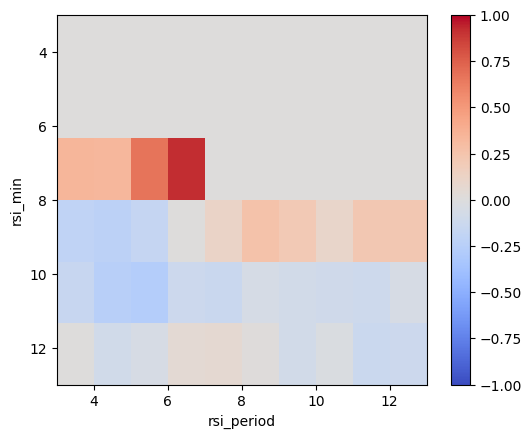

,scheduled_time,start_time,end_time,input,rsi_period,rsi_min,rsi_max,exchange,quote_currency,trade_start_time,...,metrics.risk_free_rate.value,metrics.sharpe.value,metrics.sortino.value,metrics.value_at_risk.value,metrics.variance.value,metrics.volatility.value,trades.created,trades.limits_executed,trades.limits_canceled,trades.executed_market_orders
id,,,,,,,,,,,,,,,,,,,,,
376,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:29.109951,"{'rsi_period': 16, 'rsi_min': 60.0, 'rsi_max':...",16,60.0,70.0,keyless,USD,2020-07-17 17:35:28.819588352,...,0.0,0.48,0.61,524.22,26.73,0.52,"[{'symbol': 'BTC-USD', 'id': 'ab8ae25a-09fd-18...",[],[],[{'id': 'ab8ae25a-09fd-18af-0511-b9fa02c4ddcb'...
431,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:48.866637,"{'rsi_period': 17, 'rsi_min': 60.0, 'rsi_max':...",17,60.0,70.0,keyless,USD,2020-07-17 17:35:48.572517376,...,0.0,0.48,0.61,524.22,26.90,0.52,"[{'symbol': 'BTC-USD', 'id': '5d558a05-bd1a-ed...",[],[],[{'id': '5d558a05-bd1a-ed4d-1091-5cf0cf232a68'...
79,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:32:22.425138,"{'rsi_period': 11, 'rsi_min': 20.0, 'rsi_max':...",11,20.0,70.0,keyless,USD,2020-07-17 17:32:22.086119168,...,0.0,0.43,0.35,275.60,8.99,0.30,"[{'symbol': 'BTC-USD', 'id': '442265c8-fa46-7a...",[],[],[{'id': '442265c8-fa46-7ab8-ace9-04b2b221048c'...
486,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:36:08.690294,"{'rsi_period': 18, 'rsi_min': 60.0, 'rsi_max':...",18,60.0,70.0,keyless,USD,2020-07-17 17:36:08.402842112,...,0.0,0.42,0.54,536.83,27.74,0.53,"[{'symbol': 'BTC-USD', 'id': 'd0b10182-4fdf-82...",[],[],[{'id': 'd0b10182-4fdf-82ed-a4cb-b0eec59296a9'...
541,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:36:28.825231,"{'rsi_period': 19, 'rsi_min': 60.0, 'rsi_max':...",19,60.0,70.0,keyless,USD,2020-07-17 17:36:28.544455680,...,0.0,0.42,0.54,536.83,27.74,0.53,"[{'symbol': 'BTC-USD', 'id': '05fef3de-5d7b-3f...",[],[],[{'id': '05fef3de-5d7b-3f06-f266-529789868c32'...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:04.282449,"{'rsi_period': 15, 'rsi_min': 40.0, 'rsi_max':...",15,40.0,70.0,keyless,USD,2020-07-17 17:35:03.996034816,...,0.0,-0.11,-0.11,423.76,18.13,0.43,"[{'symbol': 'BTC-USD', 'id': '1fde0158-7ef7-0d...",[],[],[{'id': '1fde0158-7ef7-0d53-08f4-be9e45867b11'...
202,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:33:57.586087,"{'rsi_period': 13, 'rsi_min': 40.0, 'rsi_max':...",13,40.0,70.0,keyless,USD,2020-07-17 17:33:56.731856128,...,0.0,-0.16,-0.16,420.74,18.19,0.43,"[{'symbol': 'BTC-USD', 'id': 'a8d2ce27-d710-e3...",[],[],[{'id': 'a8d2ce27-d710-e359-b729-03c11764b888'...
416,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:43.370929,"{'rsi_period': 17, 'rsi_min': 30.0, 'rsi_max':...",17,30.0,70.0,keyless,USD,2020-07-17 17:35:43.039775744,...,0.0,-0.17,-0.15,330.84,13.50,0.37,"[{'symbol': 'BTC-USD', 'id': 'dd7c4fbf-f57a-82...",[],[],[{'id': 'dd7c4fbf-f57a-82b6-51ef-d666df51f7a9'...


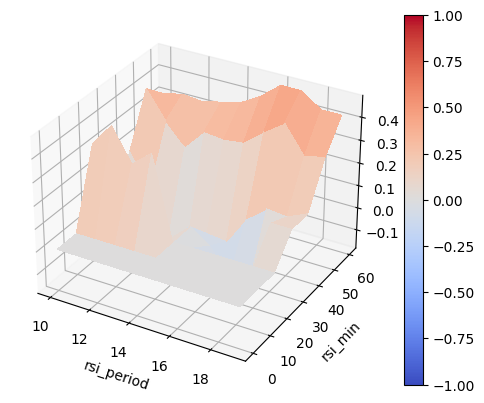

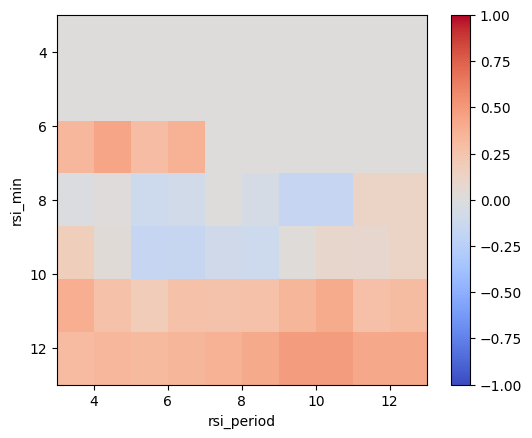

,scheduled_time,start_time,end_time,input,rsi_period,rsi_min,rsi_max,exchange,quote_currency,trade_start_time,...,metrics.risk_free_rate.value,metrics.sharpe.value,metrics.sortino.value,metrics.value_at_risk.value,metrics.variance.value,metrics.volatility.value,trades.created,trades.limits_executed,trades.limits_canceled,trades.executed_market_orders
id,,,,,,,,,,,,,,,,,,,,,
545,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:36:30.412630,"{'rsi_period': 19, 'rsi_min': 70.0, 'rsi_max':...",19,70.0,80.0,keyless,USD,2020-07-17 17:36:30.018140416,...,0.0,0.76,1.06,582.17,31.52,0.56,"[{'symbol': 'BTC-USD', 'id': '77f49c7e-986e-ed...",[],[],[{'id': '77f49c7e-986e-ed7c-f1bb-e48c06dc182c'...
490,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:36:10.050462,"{'rsi_period': 18, 'rsi_min': 70.0, 'rsi_max':...",18,70.0,80.0,keyless,USD,2020-07-17 17:36:09.696284160,...,0.0,0.76,1.05,583.56,31.69,0.56,"[{'symbol': 'BTC-USD', 'id': 'a79ef7bf-4c55-36...",[],[],[{'id': 'a79ef7bf-4c55-36de-7fd4-abb678b92533'...
435,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:50.282026,"{'rsi_period': 17, 'rsi_min': 70.0, 'rsi_max':...",17,70.0,80.0,keyless,USD,2020-07-17 17:35:49.944696576,...,0.0,0.67,0.93,574.84,30.81,0.56,"[{'symbol': 'BTC-USD', 'id': 'aed2d61a-7d36-de...",[],[],[{'id': 'aed2d61a-7d36-dec7-5af4-8c16d99cc21a'...
542,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:36:29.177735,"{'rsi_period': 19, 'rsi_min': 60.0, 'rsi_max':...",19,60.0,80.0,keyless,USD,2020-07-17 17:36:28.875194880,...,0.0,0.66,0.88,575.40,30.19,0.55,"[{'symbol': 'BTC-USD', 'id': 'a9654f06-5c31-6c...",[],[],[{'id': 'a9654f06-5c31-6c84-49a9-ba395545b76e'...
487,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:36:09.016335,"{'rsi_period': 18, 'rsi_min': 60.0, 'rsi_max':...",18,60.0,80.0,keyless,USD,2020-07-17 17:36:08.738516992,...,0.0,0.65,0.88,575.30,30.18,0.55,"[{'symbol': 'BTC-USD', 'id': '9dc64a83-f953-03...",[],[],[{'id': '9dc64a83-f953-03ac-8d58-cd6b89623a6d'...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:23.876193,"{'rsi_period': 16, 'rsi_min': 30.0, 'rsi_max':...",16,30.0,80.0,keyless,USD,2020-07-17 17:35:23.515540736,...,0.0,-0.14,-0.15,446.11,18.93,0.44,"[{'symbol': 'BTC-USD', 'id': '9730445c-c641-45...",[],[],[{'id': '9730445c-c641-4566-9fb5-5d3c4a1b2cfb'...
80,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:32:22.932160,"{'rsi_period': 11, 'rsi_min': 20.0, 'rsi_max':...",11,20.0,80.0,keyless,USD,2020-07-17 17:32:22.554314496,...,0.0,-0.17,-0.15,330.84,13.50,0.37,"[{'symbol': 'BTC-USD', 'id': 'ba708fe4-ab9c-fd...",[],[],[{'id': 'ba708fe4-ab9c-fde9-b318-ad00b8f1e76b'...
25,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:31:46.800338,"{'rsi_period': 10, 'rsi_min': 20.0, 'rsi_max':...",10,20.0,80.0,keyless,USD,2020-07-17 17:31:46.456785920,...,0.0,-0.20,-0.18,327.30,13.44,0.37,"[{'symbol': 'BTC-USD', 'id': '627e8562-82e6-c0...",[],[],[{'id': '627e8562-82e6-c08e-f63a-be6b9629aa2e'...


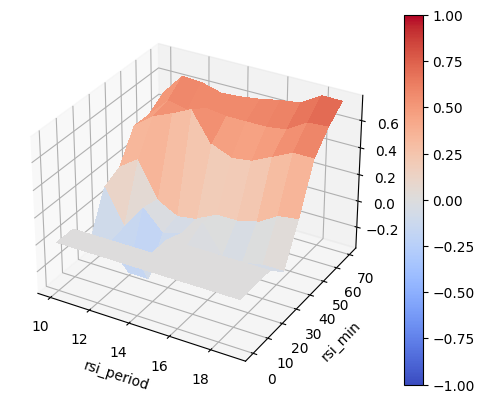

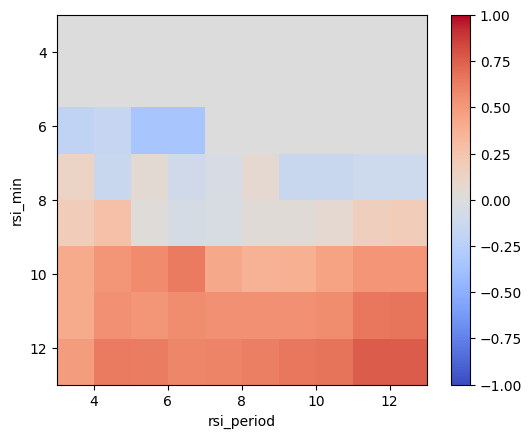

,scheduled_time,start_time,end_time,input,rsi_period,rsi_min,rsi_max,exchange,quote_currency,trade_start_time,...,metrics.risk_free_rate.value,metrics.sharpe.value,metrics.sortino.value,metrics.value_at_risk.value,metrics.variance.value,metrics.volatility.value,trades.created,trades.limits_executed,trades.limits_canceled,trades.executed_market_orders
id,,,,,,,,,,,,,,,,,,,,,
209,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:34:03.351043,"{'rsi_period': 13, 'rsi_min': 50.0, 'rsi_max':...",13,50.0,90.0,keyless,USD,2020-07-17 17:34:02.942598144,...,0.0,0.90,1.27,597.66,31.60,0.56,"[{'symbol': 'BTC-USD', 'id': '2a485618-c67b-f4...",[],[],[{'id': '2a485618-c67b-f4b3-ba12-7742aa16ecf9'...
154,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:33:18.035740,"{'rsi_period': 12, 'rsi_min': 50.0, 'rsi_max':...",12,50.0,90.0,keyless,USD,2020-07-17 17:33:17.631035136,...,0.0,0.90,1.27,597.66,31.60,0.56,"[{'symbol': 'BTC-USD', 'id': 'efb3dfcb-ee4c-08...",[],[],[{'id': 'efb3dfcb-ee4c-08a9-1ab2-44a7a70ee3d2'...
218,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:34:09.316107,"{'rsi_period': 13, 'rsi_min': 80.0, 'rsi_max':...",13,80.0,90.0,keyless,USD,2020-07-17 17:34:08.804305152,...,0.0,0.83,1.17,615.31,32.76,0.57,"[{'symbol': 'BTC-USD', 'id': 'be6e273c-1c60-ac...",[],[],[{'id': 'be6e273c-1c60-ac55-8fc5-600dddb5c05a'...
158,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:33:20.202175,"{'rsi_period': 12, 'rsi_min': 60.0, 'rsi_max':...",12,60.0,90.0,keyless,USD,2020-07-17 17:33:19.660372992,...,0.0,0.83,1.17,615.31,32.66,0.57,"[{'symbol': 'BTC-USD', 'id': 'e8734f20-2cf6-ba...",[],[],[{'id': 'e8734f20-2cf6-baf9-bf9c-63774e02286b'...
213,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:34:06.551193,"{'rsi_period': 13, 'rsi_min': 60.0, 'rsi_max':...",13,60.0,90.0,keyless,USD,2020-07-17 17:34:05.856400384,...,0.0,0.83,1.17,615.31,32.66,0.57,"[{'symbol': 'BTC-USD', 'id': '63838f44-7012-47...",[],[],[{'id': '63838f44-7012-4724-2122-1aecdf121cdd'...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:33:11.941098,"{'rsi_period': 12, 'rsi_min': 30.0, 'rsi_max':...",12,30.0,90.0,keyless,USD,2020-07-17 17:33:11.560848128,...,0.0,-0.05,-0.06,474.79,22.28,0.47,"[{'symbol': 'BTC-USD', 'id': '4061c5c6-698e-b4...",[],[],[{'id': '4061c5c6-698e-b453-8625-a9f0db4f8e05'...
81,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:32:25.187245,"{'rsi_period': 11, 'rsi_min': 20.0, 'rsi_max':...",11,20.0,90.0,keyless,USD,2020-07-17 17:32:23.013728768,...,0.0,-0.14,-0.15,446.11,18.93,0.44,"[{'symbol': 'BTC-USD', 'id': 'cd87cffb-06e9-6a...",[],[],[{'id': 'cd87cffb-06e9-6a7c-c1a0-e4b53f7f5707'...
26,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:31:47.611125,"{'rsi_period': 10, 'rsi_min': 20.0, 'rsi_max':...",10,20.0,90.0,keyless,USD,2020-07-17 17:31:46.839023872,...,0.0,-0.14,-0.15,446.11,18.93,0.44,"[{'symbol': 'BTC-USD', 'id': '4296865f-8309-9d...",[],[],[{'id': '4296865f-8309-9d3e-ed59-41419c7b00c0'...


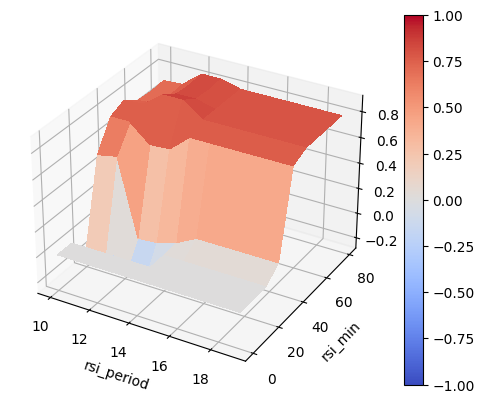

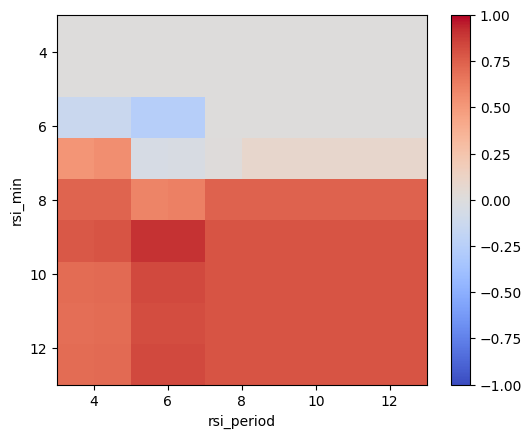

,scheduled_time,start_time,end_time,input,rsi_period,rsi_min,rsi_max,exchange,quote_currency,trade_start_time,...,metrics.risk_free_rate.value,metrics.sharpe.value,metrics.sortino.value,metrics.value_at_risk.value,metrics.variance.value,metrics.volatility.value,trades.created,trades.limits_executed,trades.limits_canceled,trades.executed_market_orders
id,,,,,,,,,,,,,,,,,,,,,
550,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:36:32.396926,"{'rsi_period': 19, 'rsi_min': 90.0, 'rsi_max':...",19,90.0,100.0,keyless,USD,2020-07-17 17:36:32.091479552,...,0.0,0.79,1.12,616.87,33.29,0.58,"[{'symbol': 'BTC-USD', 'id': 'f81bbfeb-d3b1-14...",[],[],[{'id': 'f81bbfeb-d3b1-1471-b64d-77d064b8d7c2'...
485,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:36:08.356988,"{'rsi_period': 18, 'rsi_min': 50.0, 'rsi_max':...",18,50.0,100.0,keyless,USD,2020-07-17 17:36:08.044225280,...,0.0,0.79,1.12,616.87,33.29,0.58,"[{'symbol': 'BTC-USD', 'id': '15cc10bb-eb71-39...",[],[],[{'id': '15cc10bb-eb71-3924-b9d1-76c4c405ccfb'...
217,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:34:08.605345,"{'rsi_period': 13, 'rsi_min': 70.0, 'rsi_max':...",13,70.0,100.0,keyless,USD,2020-07-17 17:34:08.258137088,...,0.0,0.79,1.12,616.87,33.29,0.58,"[{'symbol': 'BTC-USD', 'id': '638452ac-2ed9-ff...",[],[],[{'id': '638452ac-2ed9-ff68-30b9-82c990e6761f'...
219,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:34:09.864304,"{'rsi_period': 13, 'rsi_min': 80.0, 'rsi_max':...",13,80.0,100.0,keyless,USD,2020-07-17 17:34:09.392697088,...,0.0,0.79,1.12,616.87,33.29,0.58,"[{'symbol': 'BTC-USD', 'id': '9b90086c-56ee-5a...",[],[],[{'id': '9b90086c-56ee-5a72-5287-efe5b6cb6a68'...
439,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:51.685860,"{'rsi_period': 17, 'rsi_min': 80.0, 'rsi_max':...",17,80.0,100.0,keyless,USD,2020-07-17 17:35:51.395019264,...,0.0,0.79,1.12,616.87,33.29,0.58,"[{'symbol': 'BTC-USD', 'id': 'e3e12153-ff0d-1f...",[],[],[{'id': 'e3e12153-ff0d-1f1a-7dba-c7b83b70cb27'...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:21.937674,"{'rsi_period': 16, 'rsi_min': 20.0, 'rsi_max':...",16,20.0,100.0,keyless,USD,2020-07-17 17:35:21.606353664,...,0.0,0.00,NaN,0.00,0.00,0.00,[],[],[],[]
395,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:35:36.061831,"{'rsi_period': 17, 'rsi_min': 0.0, 'rsi_max': ...",17,0.0,100.0,keyless,USD,2020-07-17 17:35:35.709929984,...,0.0,0.00,NaN,0.00,0.00,0.00,[],[],[],[]
285,2023-07-17 17:31:27.562248,2023-07-17 17:31:27.562248,2023-07-17 17:34:54.206272,"{'rsi_period': 15, 'rsi_min': 0.0, 'rsi_max': ...",15,0.0,100.0,keyless,USD,2020-07-17 17:34:53.840855552,...,0.0,0.00,NaN,0.00,0.00,0.00,[],[],[],[]


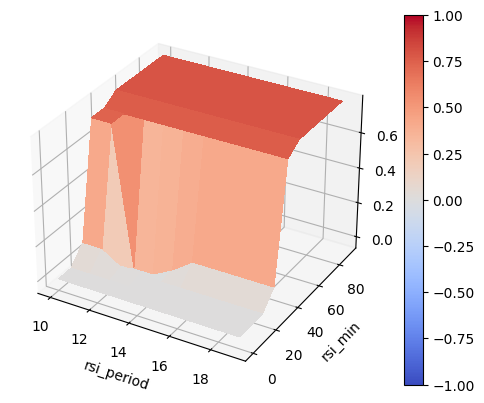

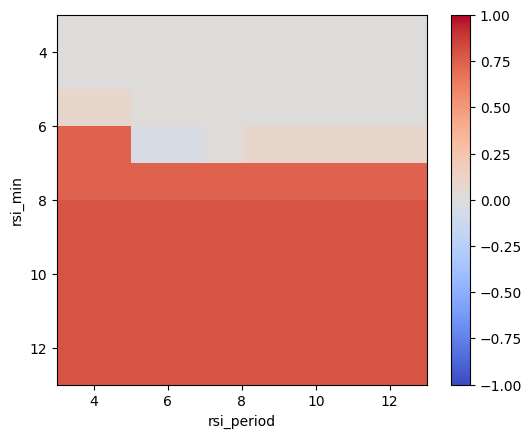

In [20]:
t_constants = itertools.product(*[df[col].unique() for col in others_parameters])
for constant in t_constants:
    q = ""
    for i, param in enumerate(others_parameters):
        if i != 0:
            q += " and "
        q += param + "==" + str(constant[i])

    df2 = df.query(q)
    df2 = df2[df2[z_col].notnull()]  # remove NaN
    df2 = df2.sort_values(z_col, ascending=False)  # sort by z_col descending
    display(HTML(f"<h2>{q}</h2>"))
    if len(df2) != 0:
        display(df2)
        display()

        if len(df2) > 2:
            x1 = np.linspace(
                df2[x_col].min(), df2[x_col].max(), len(df2[x_col].unique())
            )
            y1 = np.linspace(
                df2[y_col].min(), df2[y_col].max(), len(df2[y_col].unique())
            )
            x2, y2 = np.meshgrid(x1, y1)
            z2 = None
            try:
                z2 = griddata(
                    (df2[x_col], df2[y_col]), df2[z_col], (x2, y2), method="cubic"
                )
            except QhullError:
                pass

            if z2 is not None:
                plot_3dsurf_mpl(x2, y2, z2)

                plot_imshow_mplt(z2)

                plot_3dsurf_plotly(x2, y2, z2)

<Axes: xlabel='time'>

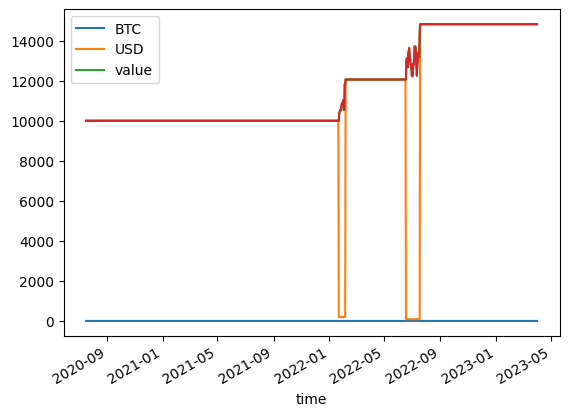

In [21]:
id = 188
df_hist = get_history(df, id)
df_hist["value"].plot()